<a href="https://colab.research.google.com/github/Gitronlee/DL_pytorch/blob/master/One_dLineRe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch[20/1000], loss: 0.925872
Epoch[40/1000], loss: 0.470991
Epoch[60/1000], loss: 0.455934
Epoch[80/1000], loss: 0.452752
Epoch[100/1000], loss: 0.449919
Epoch[120/1000], loss: 0.447124
Epoch[140/1000], loss: 0.444357
Epoch[160/1000], loss: 0.441618
Epoch[180/1000], loss: 0.438907
Epoch[200/1000], loss: 0.436225
Epoch[220/1000], loss: 0.433569
Epoch[240/1000], loss: 0.430941
Epoch[260/1000], loss: 0.428339
Epoch[280/1000], loss: 0.425764
Epoch[300/1000], loss: 0.423216
Epoch[320/1000], loss: 0.420693
Epoch[340/1000], loss: 0.418197
Epoch[360/1000], loss: 0.415725
Epoch[380/1000], loss: 0.413279
Epoch[400/1000], loss: 0.410858
Epoch[420/1000], loss: 0.408462
Epoch[440/1000], loss: 0.406091
Epoch[460/1000], loss: 0.403743
Epoch[480/1000], loss: 0.401420
Epoch[500/1000], loss: 0.399120
Epoch[520/1000], loss: 0.396844
Epoch[540/1000], loss: 0.394591
Epoch[560/1000], loss: 0.392361
Epoch[580/1000], loss: 0.390154
Epoch[600/1000], loss: 0.387969
Epoch[620/1000], loss: 0.385807
Epoch[640/10

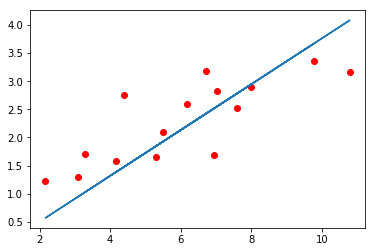

In [26]:
# 书里还是有一些错误，一没有导入必要的包二有些代码报错
import numpy as np
import torch
from torch import nn, optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],[9.779],[6.182],[7.59],[2.167],[7.042],[10.791],[5.313],[7.997],[3.1]], dtype = np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],[3.366],[2.596],[2.53],[1.221],[2.827],[3.165],[1.65],[2.904],[1.3]], dtype = np.float32)
             
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
                    
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.Linear = nn.Linear(1, 1)# 应为Linear 而非 linear
    def forward(self, x):
        out = self.Linear(x)
        return out
if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()
    
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 1e-3)

num_epochs = 1000
for epoch in range(num_epochs):
    if torch.cuda.is_available():
        inputs = Variable(x_train).cuda()
        target = Variable(y_train).cuda()
    else:
        inputs = Variable(x_train)
        target = Variable(y_train)
    
    out = model(inputs)
    loss = criterion(out, target)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(epoch+1,num_epochs, loss.item()))
        
model.eval()
predict = model(Variable(x_train).cuda())#做预测时，由于之前用cuda这里也要转一下，但是转为numpy时需要先转回cpu
predict = predict.data.cpu().numpy()

plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label = 'Original data')
plt.plot(x_train.numpy(), predict, label = 'Fitting Line')
plt.show()